<a href="https://colab.research.google.com/github/gaberm/ML-Journey/blob/master/TS_Analysis/An_Introduction_to_Exponential_Smoothing_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exponential Smoothing for Time Series Forecasting (ETS)

1. What Is Exponential Smoothing?
1. Types of Exponential Smoothing
1. How to Configure Exponential Smoothing
1. Exponential Smoothing in Python

## What Is Exponential Smoothing?

    Forecasts produced using exponential smoothing methods are weighted averages of past observations, 
    with the weights decaying exponentially as the observations get older. 
    In other words, the more recent the observation the higher the associated weight. 
  — *Page 171, [Forecasting: principles and practice](https://amzn.to/2xlJsfV), 2013.*

Exponential smoothing methods may be considered as peers and an alternative to the popular Box-Jenkins ARIMA class of methods for time series forecasting.

Collectively, the methods are sometimes referred to as ETS models, referring to the explicit modeling of Error, Trend and Seasonality.

## Types of Exponential Smoothing?

There are three main types of exponential smoothing time series forecasting methods.

A simple method that assumes no systematic structure, an extension that explicitly handles trends, and the most advanced approach that add support for seasonality.

### Single Exponential Smoothing

Single Exponential Smoothing, SES for short, also called Simple Exponential Smoothing, is a time series forecasting method for univariate data without a trend or seasonality.

It requires a single parameter, called alpha (a), also called the smoothing factor or smoothing coefficient.

This parameter controls the rate at which the influence of the observations at prior time steps decay exponentially. Alpha is often set to a value between 0 and 1. Large values mean that the model pays attention mainly to the most recent past observations, whereas smaller values mean more of the history is taken into account when making a prediction.

    A value close to 1 indicates fast learning (that is, only the most recent values influence the forecasts),
    whereas a value close to 0 indicates slow learning (past observations have a large influence on forecasts).

— Page 89, [Practical Time Series Forecasting with R](https://amzn.to/2LGKzKm), 2016.

**Hyperparameters:**

* Alpha: Smoothing factor for the level.


### Double Exponential Smoothing

Double Exponential Smoothing is an extension to Exponential Smoothing that explicitly adds support for trends in the univariate time series.

In addition to the alpha parameter for controlling smoothing factor for the level, an additional smoothing factor is added to control the decay of the influence of the change in trend called beta (b).

The method supports trends that change in different ways: an additive and a multiplicative, depending on whether the trend is linear or exponential respectively.

Double Exponential Smoothing with an additive trend is classically referred to as ```Holt’s linear trend model```, named for the developer of the method Charles Holt.

* Additive Trend: Double Exponential Smoothing with a linear trend.
* Multiplicative Trend: Double Exponential Smoothing with an exponential trend.

For longer range (multi-step) forecasts, the trend may continue on unrealistically. As such, it can be useful to dampen the trend over time.

Dampening means reducing the size of the trend over future time steps down to a straight line (no trend).

    The forecasts generated by Holt’s linear method display a constant trend (increasing or decreasing) indecently into the future. 
    Even more extreme are the forecasts generated by the exponential trend method […] Motivated by this observation […] introduced a parameter that “dampens” the trend to a flat line some time in the future.

— Page 183, [Forecasting: principles and practice](https://amzn.to/2xlJsfV), 2013.

As with modeling the trend itself, we can use the same principles in dampening the trend, specifically additively or multiplicatively for a linear or exponential dampening effect. A damping coefficient $Phi (p)$ is used to control the rate of dampening.


* **Additive Dampening:** Dampen a trend linearly.
* **Multiplicative Dampening:** Dampen the trend exponentially.

**Hyperparameters:**

* $Alpha$: Smoothing factor for the level.
* $Beta$: Smoothing factor for the trend.
* $Trend Type$: Additive or multiplicative.
* $Dampen Type$: Additive or multiplicative.
* $Phi$: Damping coefficient.


### Triple Exponential Smoothing

Triple Exponential Smoothing is an extension of Exponential Smoothing that explicitly adds support for seasonality to the univariate time series.

This method is sometimes called ```Holt-Winters Exponential Smoothing```, named for two contributors to the method: *Charles Holt* and *Peter Winters*.

In addition to the $alpha$ and $beta$ smoothing factors, a new parameter is added called $gamma (g)$ that controls the influence on the seasonal component.

As with the trend, the seasonality may be modeled as either an additive or multiplicative process for a linear or exponential change in the seasonality.

* **Additive Seasonality:** Triple Exponential Smoothing with a linear seasonality.
* **Multiplicative Seasonality:** Triple Exponential Smoothing with an exponential seasonality.

Triple exponential smoothing is the most advanced variation of exponential smoothing and through configuration, it can also develop double and single exponential smoothing models.

    Being an adaptive method, Holt-Winter’s exponential smoothing allows the level, trend and seasonality patterns to change over time.

— Page 95, [Practical Time Series Forecasting with R](https://amzn.to/2LGKzKm), 2016.

Additionally, to ensure that the seasonality is modeled correctly, the number of time steps in a seasonal period (Period) must be specified. For example, if the series was monthly data and the seasonal period repeated each year, then the Period=12.

**Hyperparameters:**

* $Alpha$: Smoothing factor for the level.
* $Beta$: Smoothing factor for the trend.
* $Gamma$: Smoothing factor for the seasonality.
* $Trend Type$: Additive or multiplicative.
* $Dampen Type$: Additive or multiplicative.
* $Phi$: Damping coefficient.
* $Seasonality Type$: Additive or multiplicative.
* $Period$: Time steps in seasonal period.

## How to Configure Exponential Smoothing

All of the model hyperparameters can be specified explicitly.

This can be challenging for experts and beginners alike.

Instead, it is common to use numerical optimization to search for and fund the smoothing coefficients ($alpha$, $beta$, $gamma$, and $phi$) for the model that result in the lowest error.

    […] a more robust and objective way to obtain values for the unknown parameters included in any exponential smoothing method is to estimate them from the observed data. […] the unknown parameters and the initial values for any exponential smoothing method can be estimated by minimizing the SSE [sum of the squared errors].

— Page 177, [Forecasting: principles and practice](https://amzn.to/2xlJsfV), 2013.

The parameters that specify the type of change in the trend and seasonality, such as weather they are additive or multiplicative and whether they should be dampened, must be specified explicitly.

## Exponential Smoothing in Python

This section looks at how to implement exponential smoothing in Python.

The implementations of Exponential Smoothing in Python are provided in the Statsmodels Python library.

The implementations are based on the description of the method in Rob Hyndman and George Athana­sopou­los’ excellent book “[Forecasting: Principles and Practice](https://amzn.to/2xlJsfV),” 2013 and their R implementations in their “forecast” package.

### Single Exponential Smoothing

Single Exponential Smoothing or simple smoothing can be implemented in Python via the SimpleExpSmoothing Statsmodels class.

In [0]:
# Env Set
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [0]:
# SES example
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from random import random
# contrived dataset
data = [x + random() for x in range(1, 100)]
# fit model
model = SimpleExpSmoothing(data).fit()

# make prediction
yhat = model.predict(len(data), len(data))
print(yhat)

[99.5255299]


In [59]:
# Forecast range 
X = np.arange(99, 110)

# Start and End 
yhat2 = model.predict( X[0], *X[-1:])

print(yhat2)

[99.5255299 99.5255299 99.5255299 99.5255299 99.5255299 99.5255299
 99.5255299 99.5255299 99.5255299 99.5255299 99.5255299]


**SES - Ram Prices**

In [82]:
# single exponential smoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

# OpenML fetch data
from sklearn.datasets import fetch_openml
dataset = fetch_openml("RAM_price") 

# Preping Data
X_train, y_train, X_test, y_test = dataset.data[:222] , dataset.target[:222], dataset.data[222:] , dataset.target[222:]
# train = np.column_stack( (X_train, y_train))

# fit model
ram_model = SimpleExpSmoothing(y_train).fit()

# make prediction
yhat = ram_model.predict(len(X_train), len(X_train) + len(X_test) - 1)
print(yhat[:5])


[0.27 0.27 0.27 0.27 0.27]


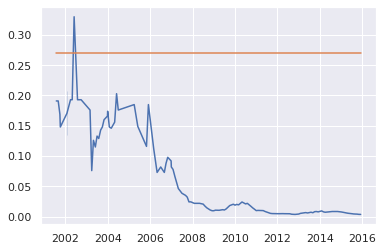

In [83]:
sns.lineplot(x=X_test.ravel(), y=y_test)
sns.lineplot(x=X_test.ravel(), y=yhat)

### Double and Triple Exponential Smoothing

Single, Double and Triple Exponential Smoothing can be implemented in Python using the ExponentialSmoothing Statsmodels class.

First, an instance of the ExponentialSmoothing class must be instantiated, specifying both the training data and some configuration for the model.

Specifically, you must specify the following configuration parameters:

*  trend: The type of trend component, as either “add” for additive or “mul” for multiplicative. Modeling the trend can be disabled by setting it to None.
*  damped: Whether or not the trend component should be damped, either True or False.
*  seasonal: The type of seasonal component, as either “add” for additive or “mul” for multiplicative. Modeling the seasonal component can be disabled by setting it to None.
*  seasonal_periods: The number of time steps in a seasonal period, e.g. 12 for 12 months in a yearly seasonal structure (more here).

The model can then be fit on the training data by calling the fit() function.

This function allows you to either specify the smoothing coefficients of the exponential smoothing model or have them optimized. By default, they are optimized (e.g. optimized=True). These coefficients include:

*  smoothing_level (alpha): the smoothing coefficient for the level.
*  smoothing_slope (beta): the smoothing coefficient for the trend.
*  smoothing_seasonal (gamma): the smoothing coefficient for the seasonal component.
*  damping_slope (phi): the coefficient for the damped trend.

Additionally, the fit function can perform basic data preparation prior to modeling; specifically:

*  use_boxcox: Whether or not to perform a power transform of the series (True/False) or specify the lambda for the transform.

The fit() function will return an instance of the HoltWintersResults class that contains the learned coefficients. The forecast() or the predict() function on the result object can be called to make a forecast.

[0.27 0.27 0.27 0.27 0.27]


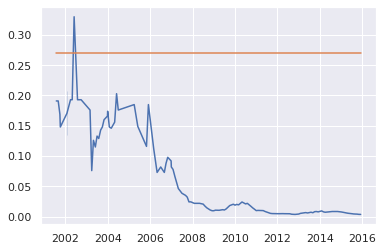

In [97]:
## Double or triple exponential smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

## prepare data
# X_train, y_train, X_test, y_test

## create class & fit model
model = ExponentialSmoothing(y_train, trend=None, damped=False, seasonal=None, \
                             seasonal_periods=None, dates=None, freq=None, missing='none').fit()

## make prediction
yhat = model.predict(len(X_train), len(X_train) + len(X_test) - 1)
print(yhat[:5])

sns.lineplot(x=X_test.ravel(), y=y_test)
sns.lineplot(x=X_test.ravel(), y=yhat)

[1.63524731e-09 9.19977941e-10 5.17572727e-10 2.91182555e-10
 1.63817134e-10]


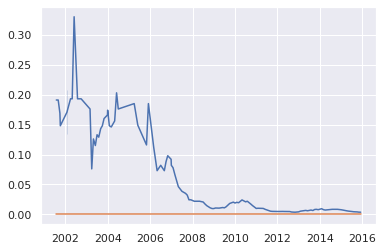

In [98]:
## Another shot
## Double or triple exponential smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

## prepare data
# X_train, y_train, X_test, y_test

## create class & fit model
model = ExponentialSmoothing(y_train, trend='mul', damped=True, seasonal=None, \
                             seasonal_periods=None, dates=None, freq=None, missing='none').fit()

## make prediction
yhat = model.predict(len(X_train), len(X_train) + len(X_test) - 1)
print(yhat[:5])

sns.lineplot(x=X_test.ravel(), y=y_test)
sns.lineplot(x=X_test.ravel(), y=yhat)